# Pandas Cheatsheet

## Import Library

In [1]:

import pandas as pd


## Creating DataFrames

In [2]:

# From a dictionary
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 24, 35, 32],
        'City': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)

# From a list of lists
data = [['John', 28, 'New York'], ['Anna', 24, 'Paris'], ['Peter', 35, 'Berlin'], ['Linda', 32, 'London']]
df_list = pd.DataFrame(data, columns=['Name', 'Age', 'City'])

# From a CSV file
# df_csv = pd.read_csv('data.csv')

# From an Excel file
# df_excel = pd.read_excel('data.xlsx', sheet_name='Sheet1')

print(df)


    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London


## Inspecting DataFrames

In [3]:

# Display the first few rows
print(df.head())

# Display the last few rows
print(df.tail())

# Display the DataFrame's shape
print(df.shape)

# Display the DataFrame's columns
print(df.columns)

# Display summary statistics
print(df.describe())


    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
(4, 3)
Index(['Name', 'Age', 'City'], dtype='object')
             Age
count   4.000000
mean   29.750000
std     4.787136
min    24.000000
25%    27.000000
50%    30.000000
75%    32.750000
max    35.000000


## Selecting Data

In [4]:

# Select a column
age = df['Age']

# Select multiple columns
name_age = df[['Name', 'Age']]

# Select rows by index
first_row = df.iloc[0]

# Select rows by label
first_row_label = df.loc[0]

# Boolean indexing
adults = df[df['Age'] > 30]

print(age)
print(name_age)
print(first_row)
print(first_row_label)
print(adults)


0    28
1    24
2    35
3    32
Name: Age, dtype: int64
    Name  Age
0   John   28
1   Anna   24
2  Peter   35
3  Linda   32
Name        John
Age           28
City    New York
Name: 0, dtype: object
Name        John
Age           28
City    New York
Name: 0, dtype: object
    Name  Age    City
2  Peter   35  Berlin
3  Linda   32  London


## Data Cleaning

In [5]:

# Drop missing values
df_dropna = df.dropna()

# Fill missing values
df_fillna = df.fillna(0)

# Drop duplicate rows
df_noduplicates = df.drop_duplicates()

# Replace values
df_replace = df.replace({'New York': 'NY', 'Paris': 'PAR'})

print(df_dropna)
print(df_fillna)
print(df_noduplicates)
print(df_replace)


    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
    Name  Age    City
0   John   28      NY
1   Anna   24     PAR
2  Peter   35  Berlin
3  Linda   32  London


## Data Transformation

In [6]:

# Apply a function to each element
df['Age'] = df['Age'].apply(lambda x: x + 1)

# Apply a function to each row/column
df['AgePlusCity'] = df.apply(lambda row: f"{row['Age']} - {row['City']}", axis=1)

# Map values
df['CityCode'] = df['City'].map({'New York': 'NY', 'Paris': 'PAR', 'Berlin': 'BER', 'London': 'LDN'})

print(df)


    Name  Age      City    AgePlusCity CityCode
0   John   29  New York  29 - New York       NY
1   Anna   25     Paris     25 - Paris      PAR
2  Peter   36    Berlin    36 - Berlin      BER
3  Linda   33    London    33 - London      LDN


## Grouping and Aggregation

In [7]:

# Group by column
grouped = df.groupby('City')

# Aggregate functions
grouped_agg = grouped.agg({'Age': 'mean'})

# Group by multiple columns
grouped_multi = df.groupby(['City', 'Name']).agg({'Age': ['mean', 'max']})

print(grouped_agg)
print(grouped_multi)


           Age
City          
Berlin    36.0
London    33.0
New York  29.0
Paris     25.0
                 Age    
                mean max
City     Name           
Berlin   Peter  36.0  36
London   Linda  33.0  33
New York John   29.0  29
Paris    Anna   25.0  25


## Merging and Joining

In [8]:

# Merge two DataFrames
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value': [4, 5, 6]})
merged = pd.merge(df1, df2, on='key', how='inner')

# Join two DataFrames
df3 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df4 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value2': [4, 5, 6]})
joined = df3.join(df4.set_index('key'), on='key')

print(merged)
print(joined)


  key  value_x  value_y
0   B        2        4
1   C        3        5
  key  value1  value2
0   A       1     4.0
1   B       2     5.0
2   C       3     NaN


## Pivot Tables

In [9]:

# Create a pivot table
pivot = df.pivot_table(values='Age', index='City', columns='Name', aggfunc='mean')

print(pivot)


Name      Anna  John  Linda  Peter
City                              
Berlin     NaN   NaN    NaN   36.0
London     NaN   NaN   33.0    NaN
New York   NaN  29.0    NaN    NaN
Paris     25.0   NaN    NaN    NaN


## Working with Dates

In [10]:

# Create a DataFrame with date column
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'], 'Value': [100, 200, 150]}
df_dates = pd.DataFrame(data)

# Convert a column to datetime
df_dates['Date'] = pd.to_datetime(df_dates['Date'])

# Extract year, month, day
df_dates['Year'] = df_dates['Date'].dt.year
df_dates['Month'] = df_dates['Date'].dt.month
df_dates['Day'] = df_dates['Date'].dt.day

print(df_dates)


        Date  Value  Year  Month  Day
0 2023-01-01    100  2023      1    1
1 2023-01-02    200  2023      1    2
2 2023-01-03    150  2023      1    3


## Sorting Data

In [11]:

# Sort by column
sorted_df = df.sort_values(by='Age')

# Sort by multiple columns
sorted_multi = df.sort_values(by=['Age', 'Name'], ascending=[False, True])

print(sorted_df)
print(sorted_multi)


    Name  Age      City    AgePlusCity CityCode
1   Anna   25     Paris     25 - Paris      PAR
0   John   29  New York  29 - New York       NY
3  Linda   33    London    33 - London      LDN
2  Peter   36    Berlin    36 - Berlin      BER
    Name  Age      City    AgePlusCity CityCode
2  Peter   36    Berlin    36 - Berlin      BER
3  Linda   33    London    33 - London      LDN
0   John   29  New York  29 - New York       NY
1   Anna   25     Paris     25 - Paris      PAR


## Plotting

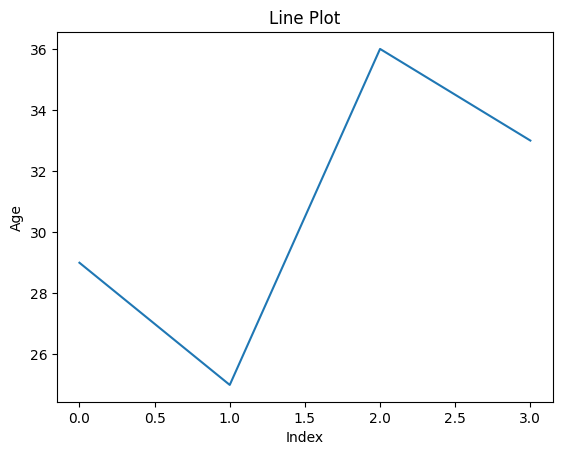

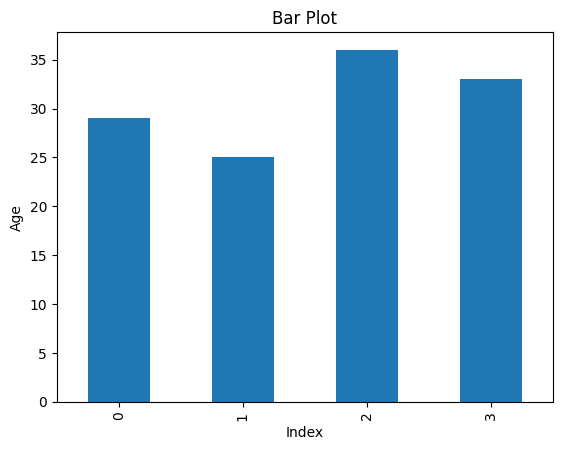

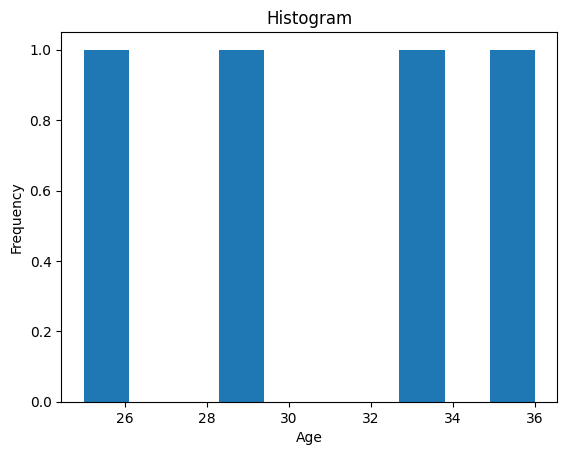

In [12]:

import matplotlib.pyplot as plt

# Line plot
df['Age'].plot(kind='line')
plt.title('Line Plot')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

# Bar plot
df['Age'].plot(kind='bar')
plt.title('Bar Plot')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

# Histogram
df['Age'].plot(kind='hist')
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Missing Data Handling

In [13]:

# Create DataFrame with missing values
data_with_na = {'Name': ['John', 'Anna', None, 'Linda'],
                'Age': [28, None, 35, 32],
                'City': ['New York', 'Paris', 'Berlin', None]}
df_with_na = pd.DataFrame(data_with_na)

# Detect missing values
missing_values = df_with_na.isna()

# Fill missing values
filled_df = df_with_na.fillna({'Name': 'Unknown', 'Age': 0, 'City': 'Unknown'})

# Drop rows with missing values
dropped_na = df_with_na.dropna()

print(missing_values)
print(filled_df)
print(dropped_na)


    Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
      Name   Age      City
0     John  28.0  New York
1     Anna   0.0     Paris
2  Unknown  35.0    Berlin
3    Linda  32.0   Unknown
   Name   Age      City
0  John  28.0  New York


## Handling Categorical Data

In [14]:

# Create DataFrame with categorical data
data_cat = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
            'City': ['New York', 'Paris', 'Berlin', 'London']}
df_cat = pd.DataFrame(data_cat)

# Convert to category type
df_cat['City'] = df_cat['City'].astype('category')

# Encode categorical data
df_cat['City_Code'] = df_cat['City'].cat.codes

print(df_cat)


    Name      City  City_Code
0   John  New York          2
1   Anna     Paris          3
2  Peter    Berlin          0
3  Linda    London          1


## Handling Large DataFrames

In [15]:

# Create a large DataFrame
large_data = {'A': range(1, 10001), 'B': range(10001, 20001)}
large_df = pd.DataFrame(large_data)

# Display memory usage
memory_usage = large_df.memory_usage(deep=True)

# Optimize DataFrame memory usage
optimized_df = large_df.copy()
optimized_df['A'] = pd.to_numeric(optimized_df['A'], downcast='unsigned')
optimized_df['B'] = pd.to_numeric(optimized_df['B'], downcast='unsigned')

print(memory_usage)
print(optimized_df.memory_usage(deep=True))


Index      128
A        80000
B        80000
dtype: int64
Index      128
A        20000
B        20000
dtype: int64
